<div style="text-align: center;">
    <h2>UNIVERSIDAD DE MONTERREY</h2>



<img src="./Logo_UDEM.jpg" width="20%">

### Vicerrectoría de Educación Superior
### División de Ingeniería y Tecnologías
### Inteligencia Artificial II
### Dr. Andrés Hernández Gutiérrez
### Proyecto Final Inteligencia Artificial 2: Detección e identificiación de caracteres en matrículas de coche


Joel Enrique Díaz Villanueva 594847 IMT

José Miguel González Zaragoza 631145 IRSI

David Sebastián Izaguirre Garza 583840 IRSI


</div>

----




Se usa para ejecutar base de datos de Kaggle.

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d foolishboi/alpr-character-train

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/foolishboi/alpr-character-train
License(s): unknown
alpr-character-train.zip: Skipping, found more recently modified local copy (use --force to force download)


Se descarga la base de datos en base a la dirección de la página web.

In [2]:
!kaggle datasets download -d andrewmvd/car-plate-detection

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/car-plate-detection
License(s): CC0-1.0
car-plate-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


Se descargan las imágenes individuales de cada base de datos.

In [3]:
!unzip car-plate-detection

Archive:  car-plate-detection.zip
replace annotations/Cars0.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: annotations/Cars0.xml   
  inflating: annotations/Cars1.xml   
  inflating: annotations/Cars10.xml  
  inflating: annotations/Cars100.xml  
  inflating: annotations/Cars101.xml  
  inflating: annotations/Cars102.xml  
  inflating: annotations/Cars103.xml  
  inflating: annotations/Cars104.xml  
  inflating: annotations/Cars105.xml  
  inflating: annotations/Cars106.xml  
  inflating: annotations/Cars107.xml  
  inflating: annotations/Cars108.xml  
  inflating: annotations/Cars109.xml  
  inflating: annotations/Cars11.xml  
  inflating: annotations/Cars110.xml  
  inflating: annotations/Cars111.xml  
  inflating: annotations/Cars112.xml  
  inflating: annotations/Cars113.xml  
  inflating: annotations/Cars114.xml  
  inflating: annotations/Cars115.xml  
  inflating: annotations/Cars116.xml  
  inflating: annotations/Cars117.xml  
  inflating: annotations/Cars118.xml  
  

Se descargan cada una de las imágenes de cada caracter a analizar

In [4]:
!unzip alpr-character-train

Archive:  alpr-character-train.zip
replace data/train/class_0/class_0_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/train/class_0/class_0_10.jpg  
  inflating: data/train/class_0/class_0_11.jpg  
  inflating: data/train/class_0/class_0_13.jpg  
  inflating: data/train/class_0/class_0_14.jpg  
  inflating: data/train/class_0/class_0_15.jpg  
  inflating: data/train/class_0/class_0_18.jpg  
  inflating: data/train/class_0/class_0_19.jpg  
  inflating: data/train/class_0/class_0_2.jpg  
  inflating: data/train/class_0/class_0_20.jpg  
  inflating: data/train/class_0/class_0_21.jpg  
  inflating: data/train/class_0/class_0_22.jpg  
  inflating: data/train/class_0/class_0_23.jpg  
  inflating: data/train/class_0/class_0_24.jpg  
  inflating: data/train/class_0/class_0_25.jpg  
  inflating: data/train/class_0/class_0_26.jpg  
  inflating: data/train/class_0/class_0_27.jpg  
  inflating: data/train/class_0/class_0_29.jpg  
  inflating: data/train/class_0/class_0_3.jpg  
  

Mostar el contenido de la carpeta.

In [5]:
!ls

alpr-character-train.zip  annotations  car-plate-detection.zip	data  images  sample_data


Mostrar los tipos de carpetas que esta presente dentro de la carpeta data.

In [6]:
!ls data

train  val


Mostrar el conteido de cada carpeta.

In [7]:
!ls data/train

class_0  class_4  class_8  class_C  class_G  class_K  class_O  class_S	class_W
class_1  class_5  class_9  class_D  class_H  class_L  class_P  class_T	class_X
class_2  class_6  class_A  class_E  class_I  class_M  class_Q  class_U	class_Y
class_3  class_7  class_B  class_F  class_J  class_N  class_R  class_V	class_Z


Instalación de las librearias que se usaran para correr todo el programa.
- cv2: será usado para toda la implementación de visión computacional con el sistema de clasificación.
- numpy: se usará para los arreglos y cuestiones matemáticas.
- matplotlib: será usado para presentar las gráficas de resultado y las imágenes que se crearon.
- pythesseract: como apoyo con cuestión de visión computacional.


In [8]:
!pip install pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image

La siguiente sección se escogerá una imagen de la base datos de las matrículas de coche y se guardara su tamaño y dimensiones para que sea usado más adelante. Además, de mostrar esos valores junto con la imagen.

263 350 3


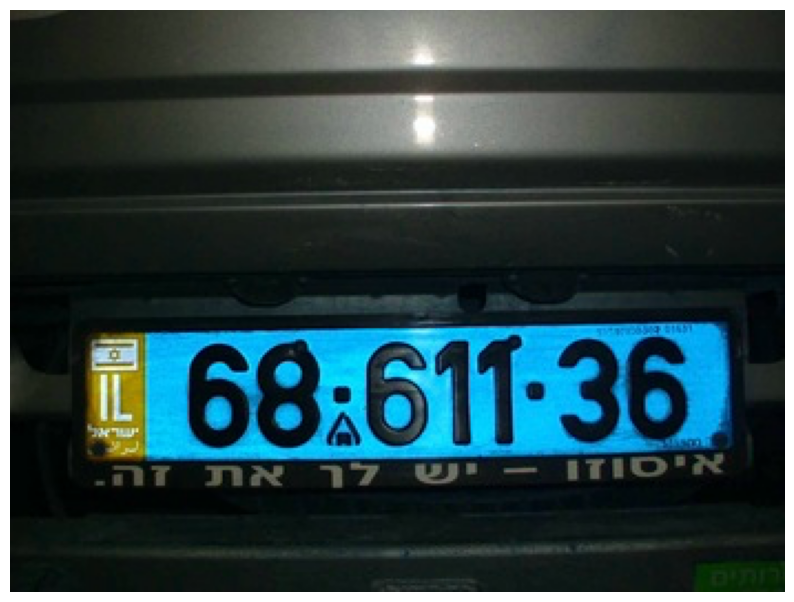

In [9]:
img = cv2.imread('/content/images/Cars102.png')

height, width, channel = img.shape
print(height, width, channel)

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

Se convirtió a escala de grises para que sea más fácil de usar con el sistema de visión computacional.

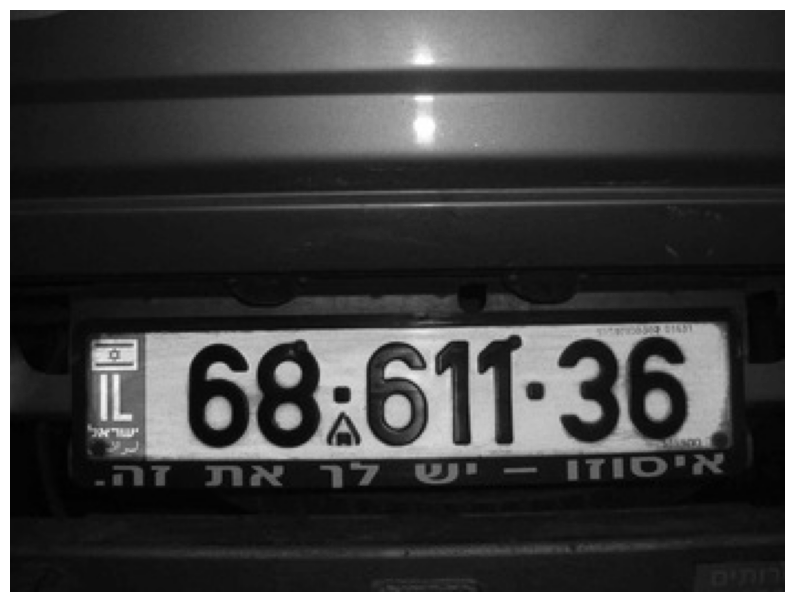

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

Se aplica un filtrora detectar zonas de interés dentro de la imagen

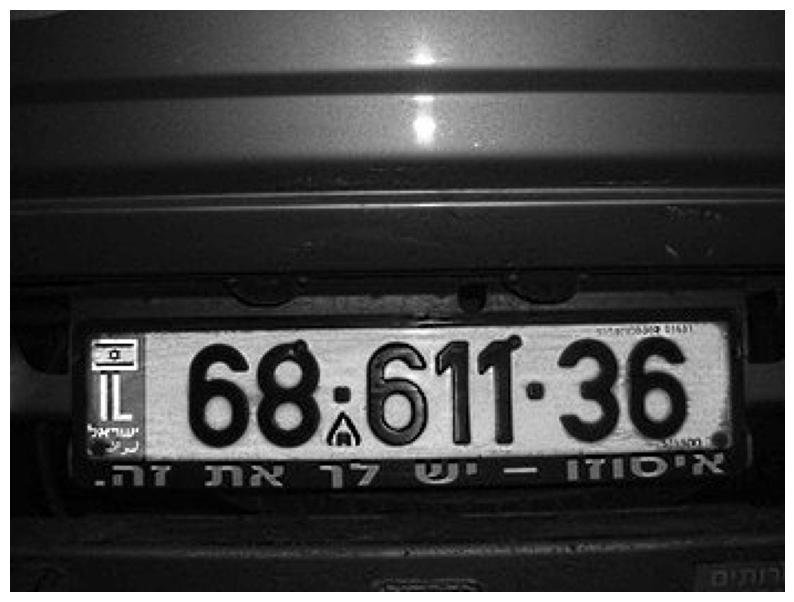

In [11]:
structureElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

imTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structureElement)
imBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structureElement)

imgGrayplusTopHat = cv2.add(gray, imTopHat)
gray = cv2.subtract(imgGrayplusTopHat, imBlackHat)

plt.figure(figsize=(10,10))
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

Se aplica un filtro para que se vuelva binario.

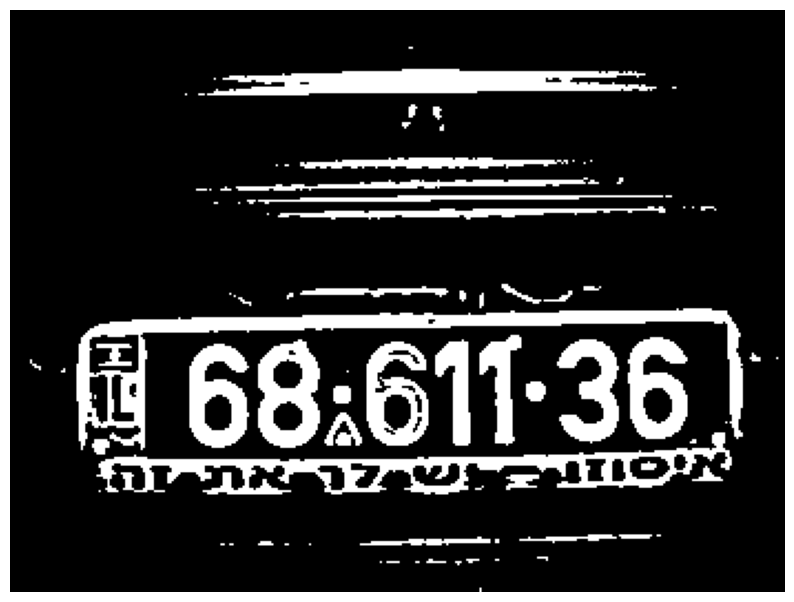

In [12]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5,5), sigmaX=0)

img_threshold = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)

plt.figure(figsize=(10,10))
plt.imshow(img_threshold,cmap='gray')
plt.axis('off')
plt.show()


Se generan bordes en base a lo detectado en la imagen.

(-0.5, 349.5, 262.5, -0.5)

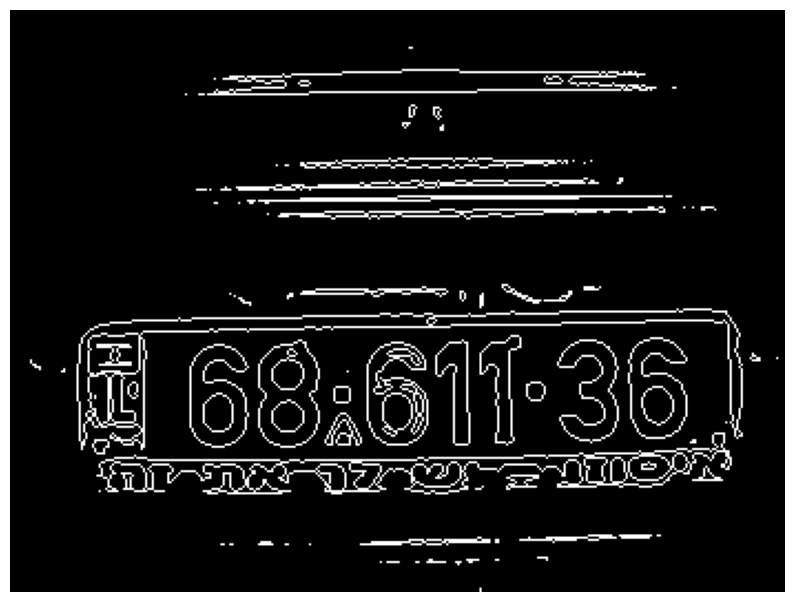

In [13]:
contours, _ = cv2.findContours(
    img_threshold,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255,255,255))

plt.figure(figsize=(10,10))
plt.imshow(temp_result)
plt.axis('off')

Se colocan rectángulos en todas las zonas donde haya datos mediante la detección de bordes.

(-0.5, 349.5, 262.5, -0.5)

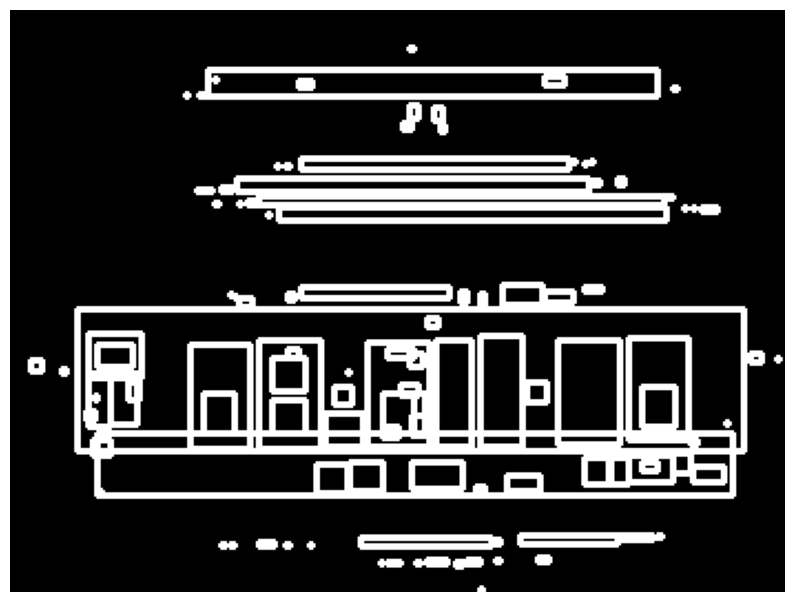

In [14]:
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x,y), pt2=(x+w, y+h), color=(255,255,255), thickness=2)

    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

plt.figure(figsize=(10,10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')

Se reduce el número de recuadros mediante un cambio en el área para que los que no cumplan con ese parámetro no sean válidos.

(-0.5, 349.5, 262.5, -0.5)

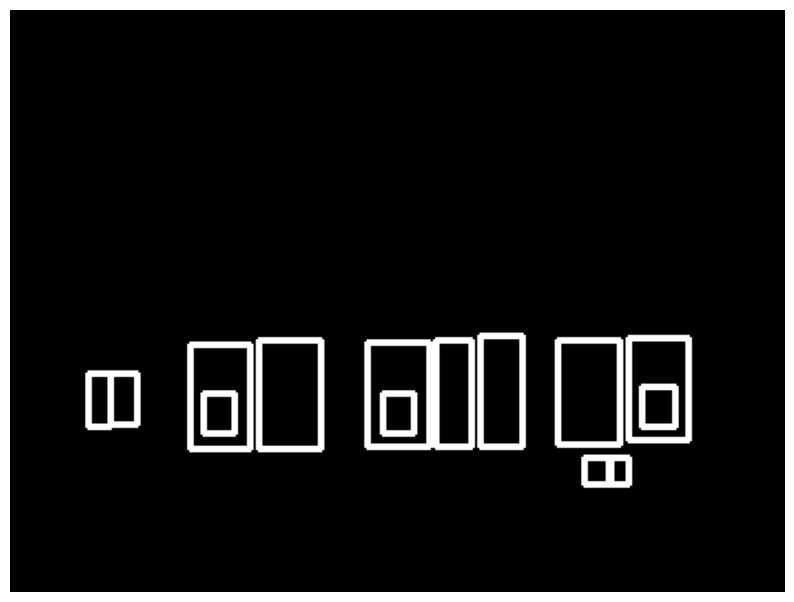

In [15]:
MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']

    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(10,10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')

En base a nuevas áreas se reduce el número de recuadros seleccionados.

(-0.5, 349.5, 262.5, -0.5)

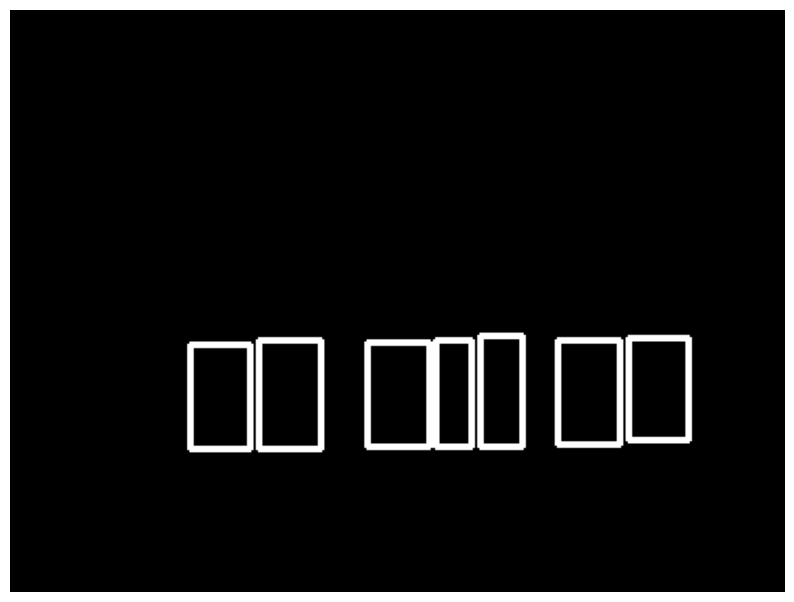

In [16]:


MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.0 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []

    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)

        # recursive
        recursive_contour_list = find_chars(unmatched_contour)

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx

result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        #cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)


plt.figure(figsize=(10,10))
plt.imshow(temp_result, cmap='gray')
plt.axis('off')


Se confirma que los rectángulos que se crearon coinciden con los números de las matrículas.

(-0.5, 349.5, 262.5, -0.5)

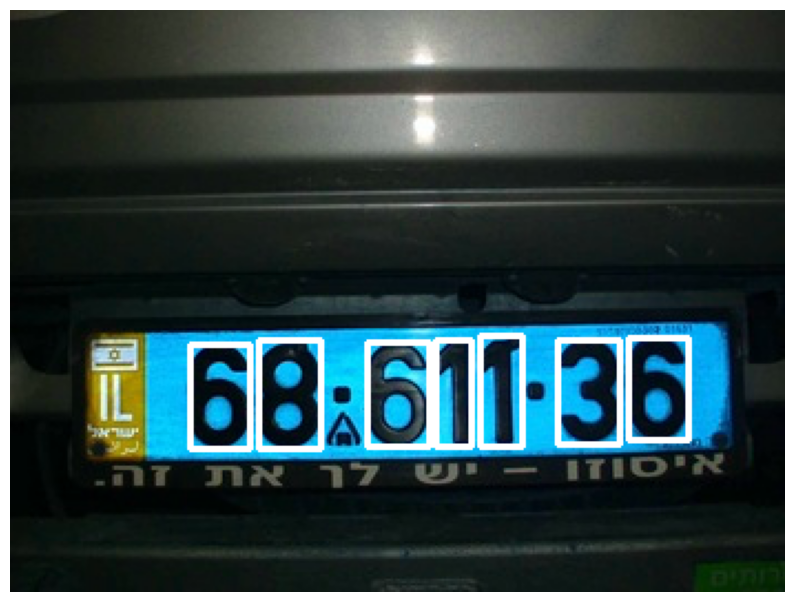

In [17]:
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
        #cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(img, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

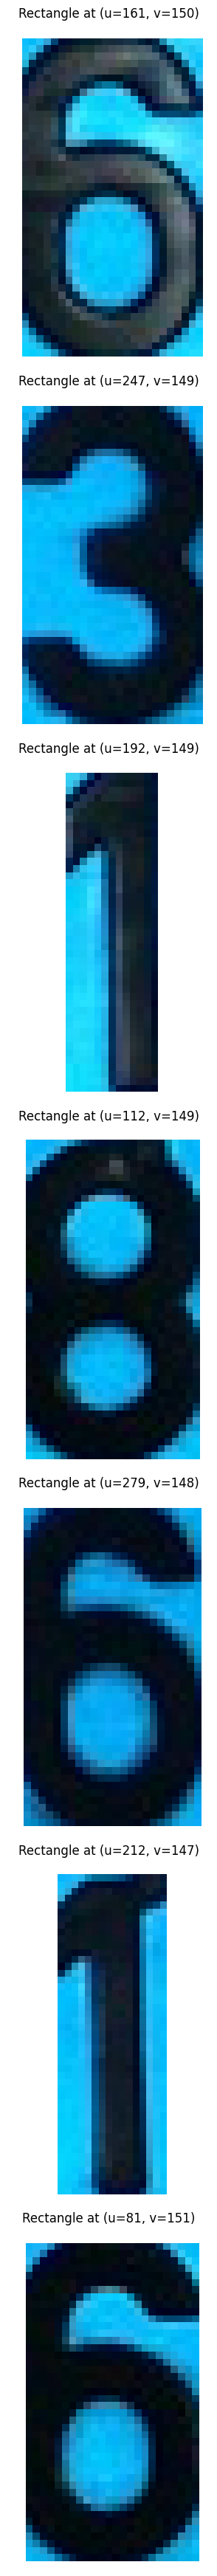

In [18]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'matched_result' and 'img' are defined from the previous code

# Create a tensor to store rectangle information
rectangle_data = []

# Iterate through the matched results
for r in matched_result:
    for d in r:
        x, y, w, h = d['x'], d['y'], d['w'], d['h']
        # Extract the rectangle from the image
        rectangle_img = img[y:y+h, x:x+w]

        # Store rectangle data
        rectangle_data.append({
            'u': x,  # Assuming u and v are the x and y coordinates
            'v': y,
            'pixels': rectangle_img
        })

# Display the rectangles in subplots
fig, axes = plt.subplots(len(rectangle_data), 1, figsize=(5, 5 * len(rectangle_data)))

for i, rect_data in enumerate(rectangle_data):
    axes[i].imshow(rect_data['pixels'])
    axes[i].set_title(f"Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

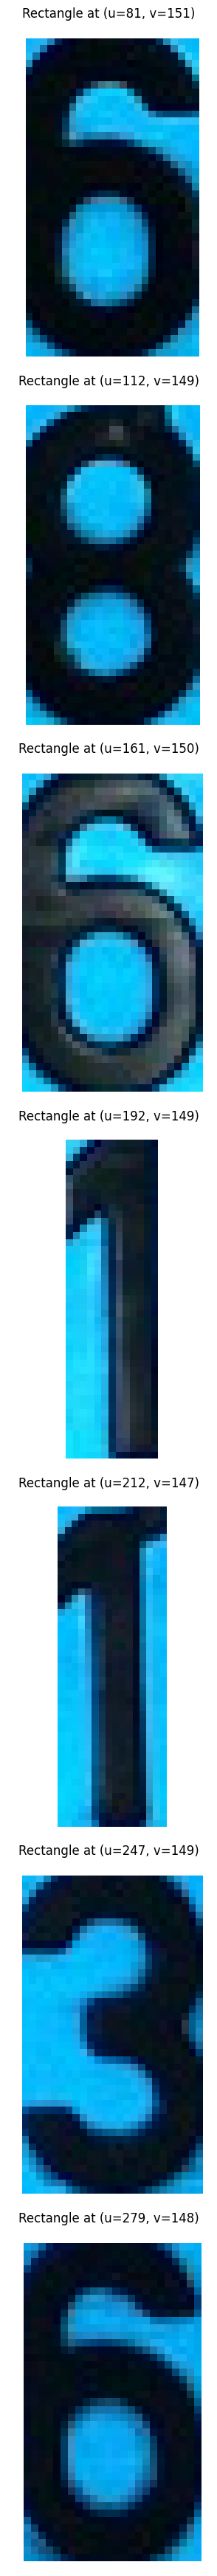

In [19]:

# Sort the rectangle_data based on the 'u' (x-coordinate) value
sorted_rectangles = sorted(rectangle_data, key=lambda item: item['u'])

# Display the sorted rectangles in subplots
fig, axes = plt.subplots(len(sorted_rectangles), 1, figsize=(5, 5 * len(sorted_rectangles)))

for i, rect_data in enumerate(sorted_rectangles):
    axes[i].imshow(rect_data['pixels'])
    axes[i].set_title(f"Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

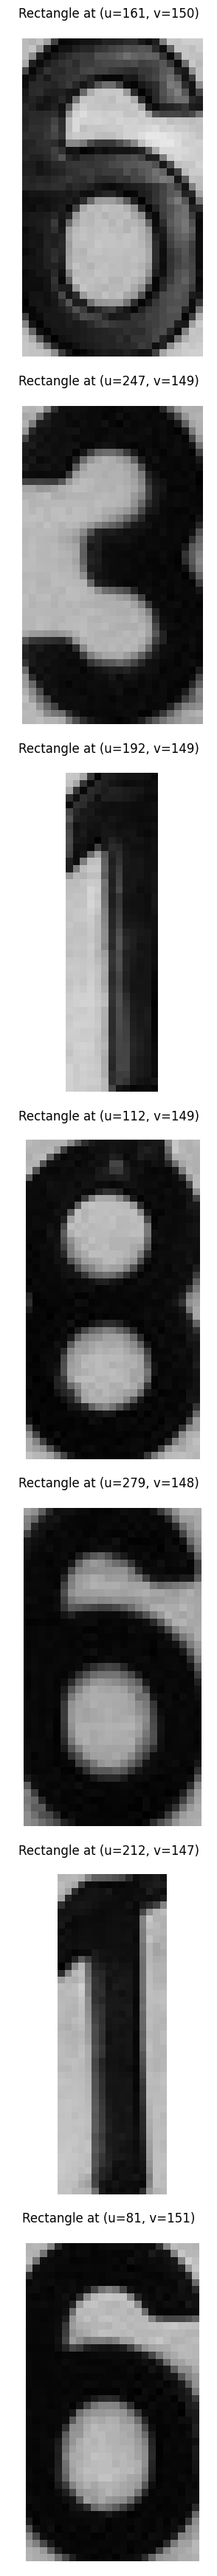

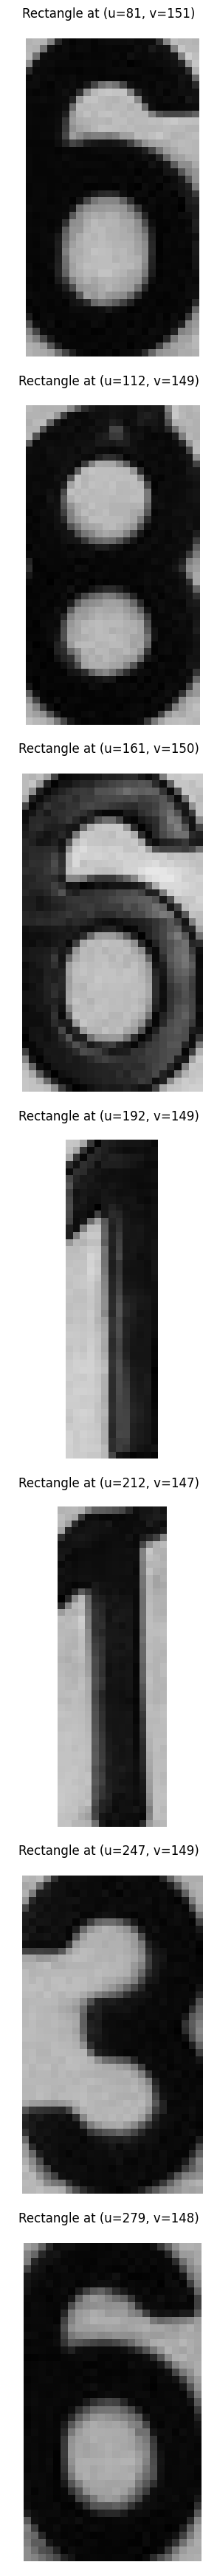

In [20]:

rectangle_data = []

# Iterate through the matched results
for r in matched_result:
    for d in r:
        x, y, w, h = d['x'], d['y'], d['w'], d['h']
        # Extract the rectangle from the image
        rectangle_img = img[y:y+h, x:x+w]

        # Convert the rectangle image to grayscale
        gray_rectangle = cv2.cvtColor(rectangle_img, cv2.COLOR_BGR2GRAY)

        # Store rectangle data
        rectangle_data.append({
            'u': x,  # Assuming u and v are the x and y coordinates
            'v': y,
            'pixels': gray_rectangle
        })

# Display the rectangles in subplots
fig, axes = plt.subplots(len(rectangle_data), 1, figsize=(5, 5 * len(rectangle_data)))

for i, rect_data in enumerate(rectangle_data):
    axes[i].imshow(rect_data['pixels'], cmap='gray') # Display in grayscale
    axes[i].set_title(f"Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Sort the rectangle_data based on the 'u' (x-coordinate) value
sorted_rectangles = sorted(rectangle_data, key=lambda item: item['u'])

# Display the sorted rectangles in subplots
fig, axes = plt.subplots(len(sorted_rectangles), 1, figsize=(5, 5 * len(sorted_rectangles)))

for i, rect_data in enumerate(sorted_rectangles):
    axes[i].imshow(rect_data['pixels'], cmap='gray') # Display in grayscale
    axes[i].set_title(f"Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

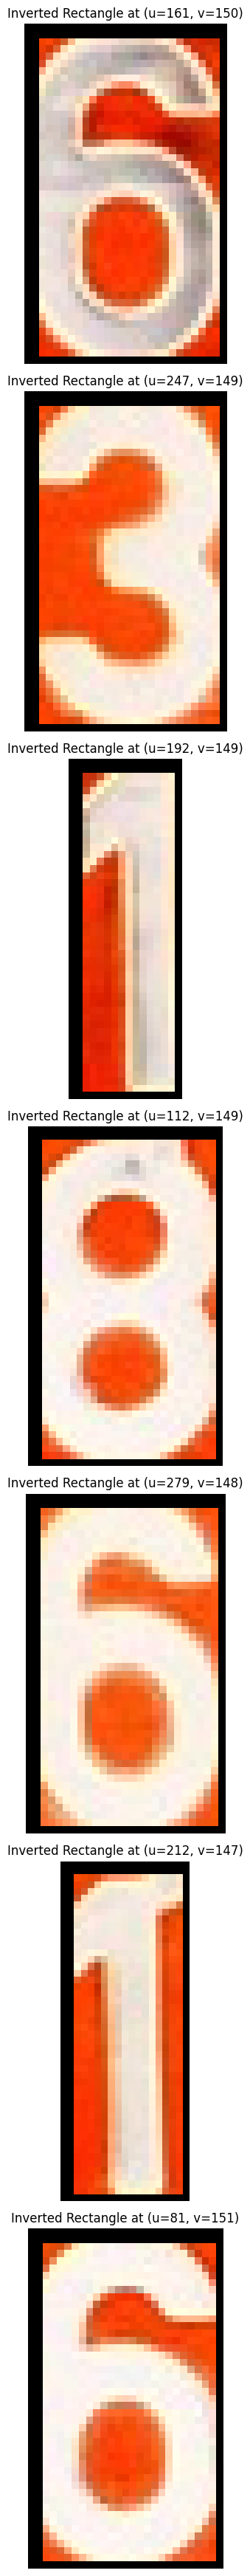

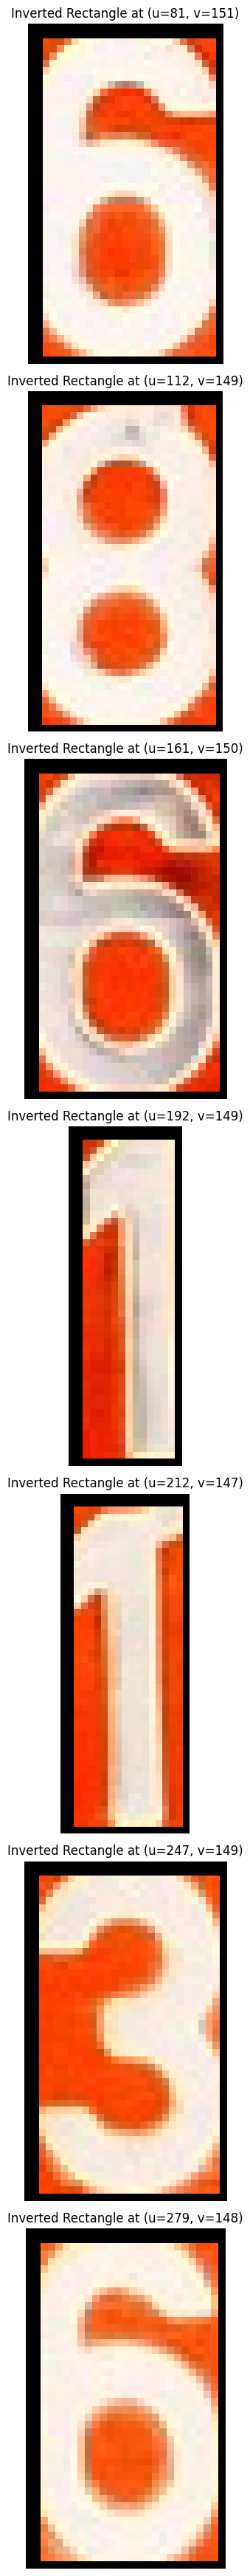

In [21]:

rectangle_data = []

# Iterate through the matched results
for r in matched_result:
    for d in r:
        x, y, w, h = d['x'], d['y'], d['w'], d['h']
        # Extract the rectangle from the image
        rectangle_img = img[y:y+h, x:x+w]

        # Invert the colors of the rectangle image
        inverted_rectangle = cv2.bitwise_not(rectangle_img)

        # Store rectangle data
        rectangle_data.append({
            'u': x,  # Assuming u and v are the x and y coordinates
            'v': y,
            'pixels': inverted_rectangle
        })

# Display the inverted rectangles in subplots
fig, axes = plt.subplots(len(rectangle_data), 1, figsize=(5, 5 * len(rectangle_data)))

for i, rect_data in enumerate(rectangle_data):
    axes[i].imshow(rect_data['pixels'])
    axes[i].set_title(f"Inverted Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Sort the rectangle_data based on the 'u' (x-coordinate) value
sorted_rectangles = sorted(rectangle_data, key=lambda item: item['u'])

# Display the sorted and inverted rectangles in subplots
fig, axes = plt.subplots(len(sorted_rectangles), 1, figsize=(5, 5 * len(sorted_rectangles)))

for i, rect_data in enumerate(sorted_rectangles):
    axes[i].imshow(rect_data['pixels'])
    axes[i].set_title(f"Inverted Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

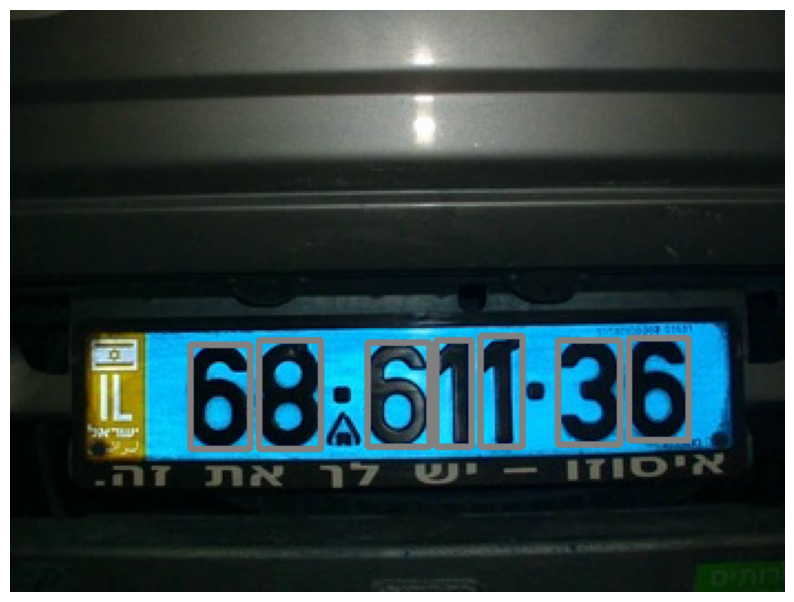

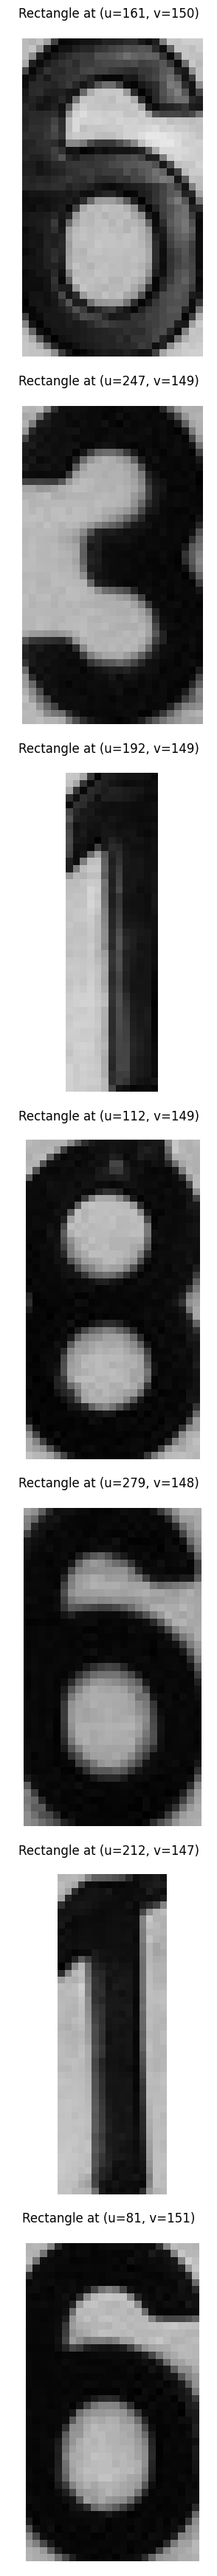

In [22]:

rectangle_data = []

# Iterate through the matched results
for r in matched_result:
    for d in r:
        x, y, w, h = d['x'], d['y'], d['w'], d['h']
        # Extract the rectangle from the image
        rectangle_img = img[y:y+h, x:x+w]

        # Convert the rectangle image to grayscale
        gray_rectangle = cv2.cvtColor(rectangle_img, cv2.COLOR_BGR2GRAY)

        # Draw a gray frame around the rectangle on the original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (128, 128, 128), 2)  # Gray color (128, 128, 128)

        # Store rectangle data
        rectangle_data.append({
            'u': x,
            'v': y,
            'pixels': gray_rectangle
        })

# Display the image with gray frames around the rectangles
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

# Display the grayscale rectangles in subplots
fig, axes = plt.subplots(len(rectangle_data), 1, figsize=(5, 5 * len(rectangle_data)))

for i, rect_data in enumerate(rectangle_data):
    axes[i].imshow(rect_data['pixels'], cmap='gray')  # Display in grayscale
    axes[i].set_title(f"Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

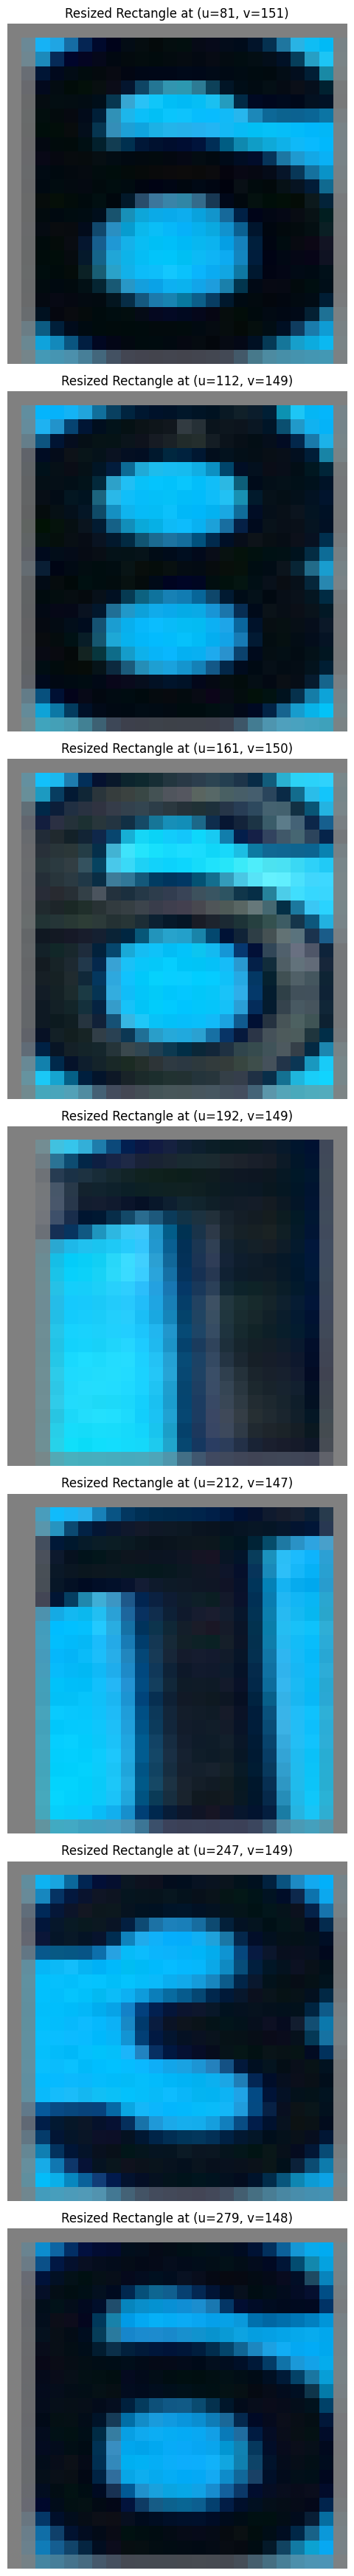

(7, 24, 24, 3)

In [23]:

resized_rectangles = []

# Iterate through the matched results
for r in matched_result:
    for d in r:
        x, y, w, h = d['x'], d['y'], d['w'], d['h']
        # Extract the rectangle from the image
        rectangle_img = img[y:y+h, x:x+w]

        # Resize the rectangle to 24x24
        resized_img = cv2.resize(rectangle_img, (24, 24))

        # Store resized rectangle data
        resized_rectangles.append({
            'u': x,
            'v': y,
            'pixels': resized_img
        })

# Sort the resized_rectangles based on the 'u' (x-coordinate) value
sorted_resized_rectangles = sorted(resized_rectangles, key=lambda item: item['u'])


# Display the sorted and resized rectangles
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(sorted_resized_rectangles), 1, figsize=(5, 5 * len(sorted_resized_rectangles)))

for i, rect_data in enumerate(sorted_resized_rectangles):
    axes[i].imshow(rect_data['pixels'])
    axes[i].set_title(f"Resized Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Create a single tensor (NumPy array) to hold all resized rectangles
tensor_rectangles = np.array([rect_data['pixels'] for rect_data in sorted_resized_rectangles])

tensor_rectangles.shape

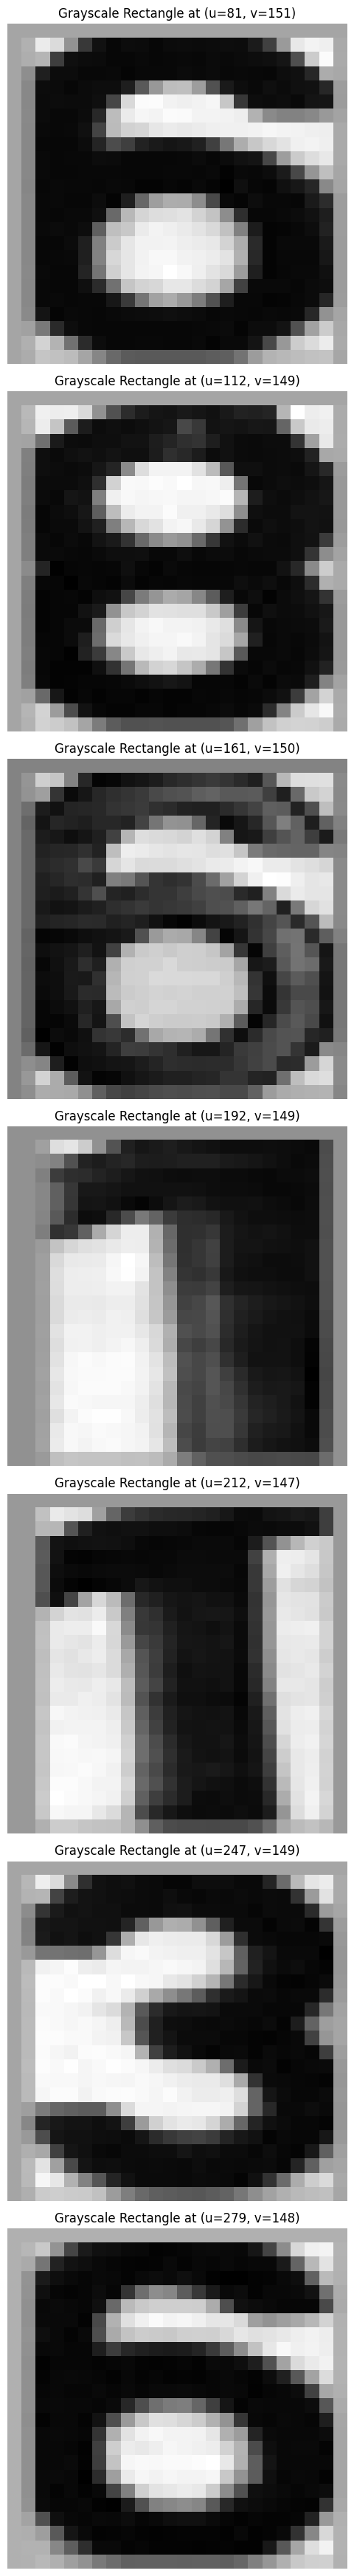

In [24]:

grayscale_rectangles = []

# Iterate through the resized rectangles
for rect_data in sorted_resized_rectangles:
    # Convert the resized image to grayscale
    gray_img = cv2.cvtColor(rect_data['pixels'], cv2.COLOR_BGR2GRAY)

    # Scale the grayscale values to 0-255
    gray_img = cv2.normalize(gray_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    grayscale_rectangles.append({
        'u': rect_data['u'],
        'v': rect_data['v'],
        'pixels': gray_img
    })


# Display the grayscale rectangles in subplots
fig, axes = plt.subplots(len(grayscale_rectangles), 1, figsize=(5, 5 * len(grayscale_rectangles)))

for i, rect_data in enumerate(grayscale_rectangles):
    axes[i].imshow(rect_data['pixels'], cmap='gray')  # Display in grayscale
    axes[i].set_title(f"Grayscale Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

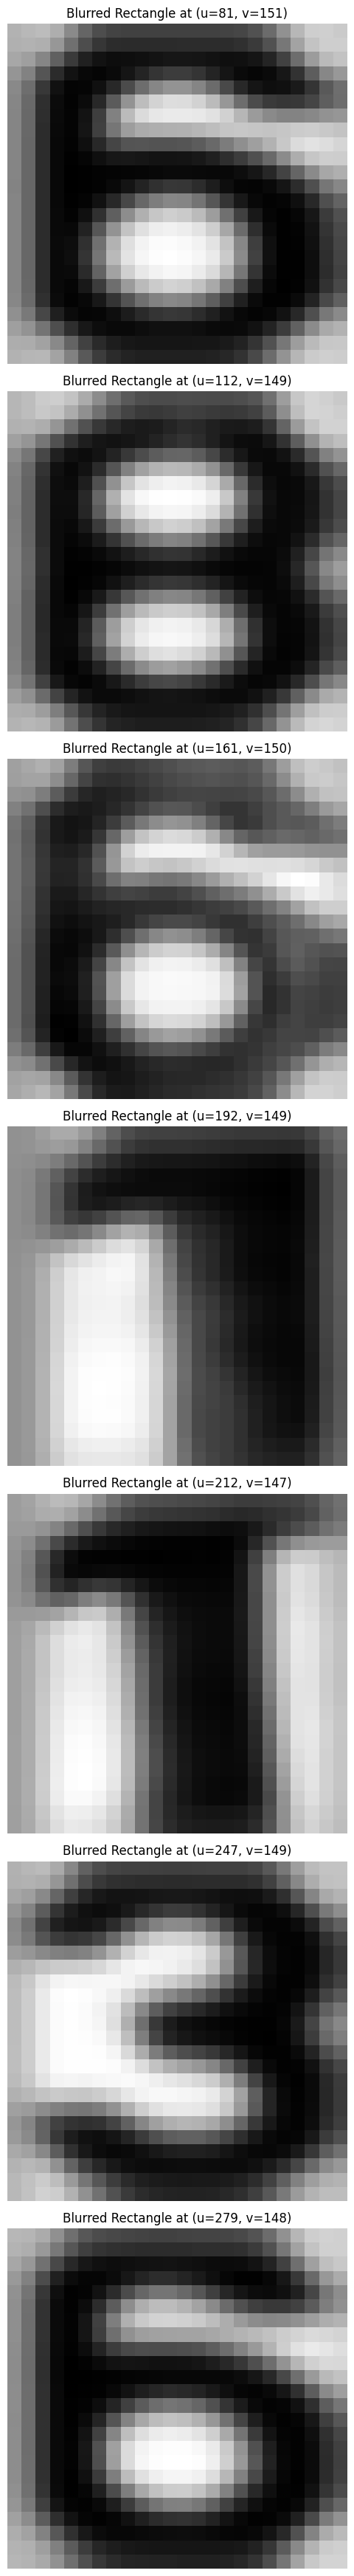

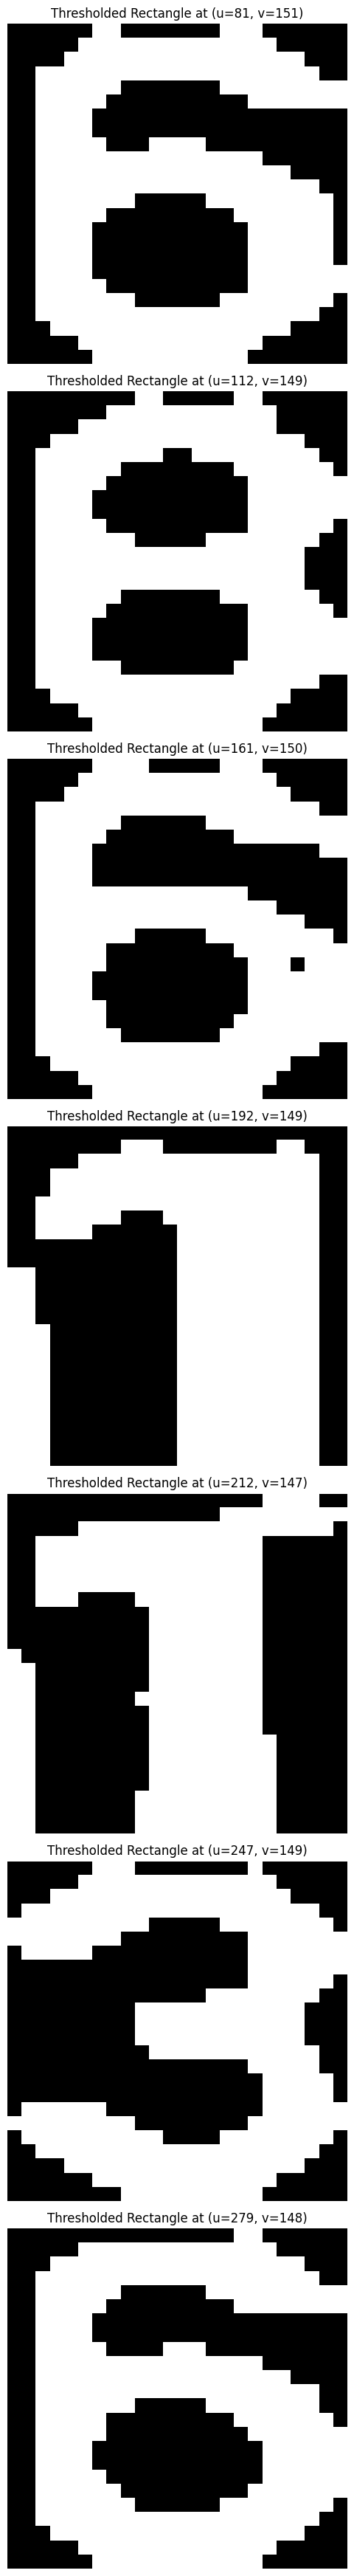

In [25]:

blurred_rectangles = []

for rect_data in grayscale_rectangles:
    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(rect_data['pixels'], ksize=(5, 5), sigmaX=0)

    blurred_rectangles.append({
        'u': rect_data['u'],
        'v': rect_data['v'],
        'pixels': blurred_img
    })

# Display the blurred rectangles
fig, axes = plt.subplots(len(blurred_rectangles), 1, figsize=(5, 5 * len(blurred_rectangles)))

for i, rect_data in enumerate(blurred_rectangles):
    axes[i].imshow(rect_data['pixels'], cmap='gray')
    axes[i].set_title(f"Blurred Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


thresholded_rectangles = []

for rect_data in blurred_rectangles:
    # Apply adaptive thresholding
    thresholded_img = cv2.adaptiveThreshold(
        rect_data['pixels'],
        maxValue=255.0,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY_INV,
        blockSize=19,
        C=9
    )
    thresholded_rectangles.append({
        'u': rect_data['u'],
        'v': rect_data['v'],
        'pixels': thresholded_img
    })

# Display the thresholded rectangles
fig, axes = plt.subplots(len(thresholded_rectangles), 1, figsize=(5, 5 * len(thresholded_rectangles)))

for i, rect_data in enumerate(thresholded_rectangles):
    axes[i].imshow(rect_data['pixels'], cmap='gray')
    axes[i].set_title(f"Thresholded Rectangle at (u={rect_data['u']}, v={rect_data['v']})")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Inicio de la red Neuronal

In [26]:
import matplotlib.pyplot as plt # Está diseñada para crear gráficos y visualizaciones interactivas de datos, por ejemplo, para trazar las curvas de aprendizaje y evaluar el proceso de entrenamiento.
import numpy as np # Se utiliza para crear arreglos multidimensionales y realizar operaciones matemáticas, lógicas y de álgebra lineal, además de la generación de números aleatorios.
import os # Permite trabajar con archivos y directorios, gestionar rutas, y realizar operaciones relacionadas con el sistema.
import tensorflow as tf # Librería desarrollada por Google, es de las más utilizadas para diseñar, entrenar, validar y probar el desarrollo de una red neuronal.
from tensorflow.keras.applications import MobileNetV2 # Importa el modelo preentrenado MobileNetV2.
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # Importa capas comunes en una red neuronal.
from tensorflow.keras.models import Model # Importa la base para crear modelos personalizados en TensorFlow.
from tensorflow.keras.optimizers import Adam # Importa el optimizador Adam.
from tensorflow.keras.callbacks import EarlyStopping # Importa el regulizador EarlyStopping.
from tensorflow.keras.utils import load_img, img_to_array # Carga y convierte imágenes en arreglos para su uso en redes neuronales.
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Se utiliza para gráficar en una matriz una comparación entre los valores reales y predichos.
import cv2 # Procesa imágenes y videos, útil para tareas de visión por computadora.
import keras # Librería de redes neuronales.
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras.models import Sequential

In [27]:
tf.random.set_seed(21) # Se fija una semilla para obtener respuestas similares al trabajar con el entrenamiento de redes neuronales.
np.random.seed(21) # Se fija una semilla para obtener respuestas similares al trabajar con números aleatorios.

In [1]:
train_dir = '/content/data/train'
validation_dir = '/content/data/val'

In [29]:
BATCH_SIZE = 16 # Se establece el directorio de entrenamiento.
IMG_SIZE = (24, 24) # Se establece el tamaño de imagen 224x224 píxeles.

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

# Obtener las clases automáticamente
class_names = train_dataset.class_names
print(f"Clases detectadas: {class_names}")

Found 864 files belonging to 36 classes.
Clases detectadas: ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_A', 'class_B', 'class_C', 'class_D', 'class_E', 'class_F', 'class_G', 'class_H', 'class_I', 'class_J', 'class_K', 'class_L', 'class_M', 'class_N', 'class_O', 'class_P', 'class_Q', 'class_R', 'class_S', 'class_T', 'class_U', 'class_V', 'class_W', 'class_X', 'class_Y', 'class_Z']


In [31]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True, # Baraja aleatoriamente las imágenes para mezclar los datos de entrenamiento.
                                                                 batch_size=BATCH_SIZE, # Divide las imágenes en lotes de tamaño.
                                                                 image_size=IMG_SIZE) # Redimensiona automáticamente todas las imágenes a un tamaño de 224x224 píxeles.

Found 216 files belonging to 36 classes.


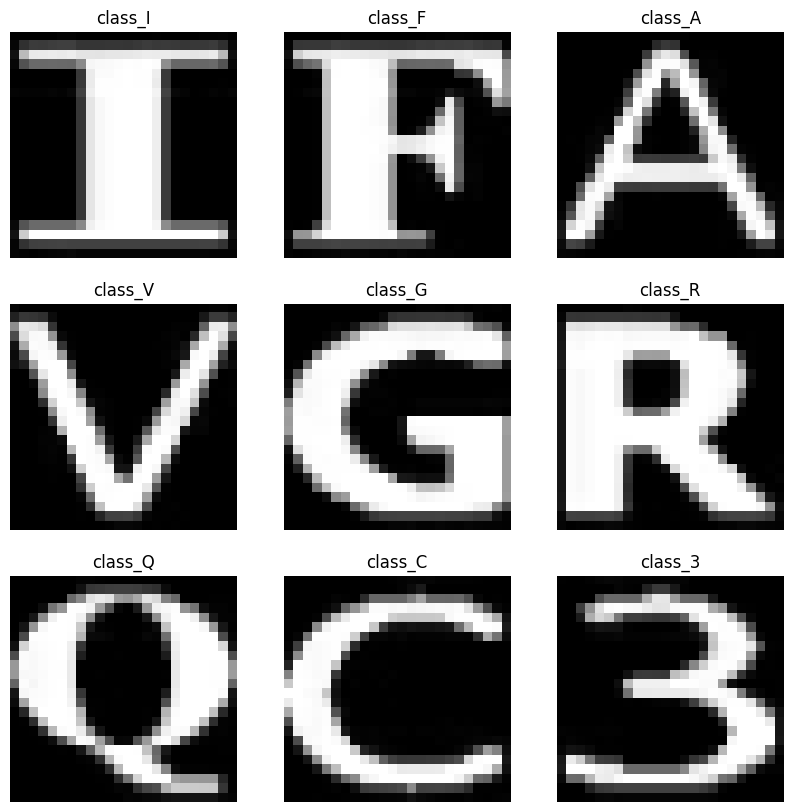

In [ ]:
class_names = train_dataset.class_names # Extrae los nombres de las clases del conjunto de datos de entrenamiento.

plt.figure(figsize=(10, 10)) # Se muestran las primeras 9 imágenes del conjunto de entrenamiento.
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Descripción del código

El código realiza la normalización de los datos de las imágenes en los conjuntos de entrenamiento y validación.

1. *Objetivo*:
   - Las imágenes en los conjuntos de datos deben ser normalizadas para que sus valores estén en el rango de [0, 1], lo que facilita el entrenamiento de modelos de aprendizaje automático. Esta normalización se realiza dividiendo los valores de los píxeles por 255.0.

2. *Detalles del proceso*:
   - **Función map()**: Se utiliza para aplicar una operación a cada elemento de los conjuntos de datos train_dataset y validation_dataset.
   - *Normalización*: Cada imagen x en el conjunto de datos se convierte a tipo flotante con tf.cast(x, tf.float32) y luego se divide por 255.0. Esto asegura que los valores de los píxeles, que originalmente están en el rango de [0, 255], se transformen al rango de [0, 1].
   - *Preservación de las etiquetas*: Las etiquetas y del conjunto de datos se mantienen sin cambios durante el proceso de normalización.

3. *Propósito*:
   - La normalización mejora la estabilidad y la convergencia del modelo durante el entrenamiento, especialmente cuando se utiliza una función de activación como *ReLU*, que funciona mejor cuando los valores de entrada están en un rango pequeño y homogéneo.

In [32]:
# Operaciones como dividir por 255 (x / 255.0) requieren que los datos sean de tipo flotante.
train_dataset = train_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))  # Se normalizan los datos de entrenamiento en un rango de [0 1].
validation_dataset = validation_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)) # Se normalizan los datos de validación en un rango de [0 1].

### Descripción general

Este código define un modelo de red neuronal convolucional (CNN) utilizando Keras, que se utiliza comúnmente para tareas de clasificación de imágenes.

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(24, 24, 3)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(36, activation='linear')
])

### Descripción general

Este código compila el modelo especificando la función de pérdida, el optimizador y las métricas para el entrenamiento.

In [34]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

from tensorflow.keras.optimizers import Adam


model.compile(optimizer = Adam(learning_rate=0.001), loss=loss_function, metrics=['accuracy'])

### Descripción general

Este código utiliza la técnica de *early stopping* para evitar el sobreentrenamiento, deteniendo el entrenamiento cuando no hay mejora en la pérdida de validación durante un número determinado de épocas.

In [35]:
early_stopping = EarlyStopping( # Se establece el regulador EarlyStopping.
    patience=5,
    monitor='val_loss',
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=70,
    callbacks=[early_stopping] # Se añade el EarlyStopping como callback para evitar periodos largos de entrenamiento.
)

Epoch 1/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.0906 - loss: 4.2047 - val_accuracy: 0.0556 - val_loss: 4.2032
Epoch 2/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4829 - loss: 2.6023 - val_accuracy: 0.0926 - val_loss: 4.5852
Epoch 3/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7356 - loss: 1.8747 - val_accuracy: 0.1019 - val_loss: 4.7412
Epoch 4/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7977 - loss: 1.5211 - val_accuracy: 0.0787 - val_loss: 4.5753
Epoch 5/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 1.2427 - val_accuracy: 0.1435 - val_loss: 4.0333
Epoch 6/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9127 - loss: 1.0716 - val_accuracy: 0.1713 - val_loss: 3.6707
Epoch 7/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9216 - loss: 0.9707 - val_accuracy: 0.3056 - val_loss: 2.9408
Epoch 8/70
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9481 - loss: 0.8712 - val_accuracy: 0.4074 - val_los

### Descripción general

Este código grafica la precisión y la pérdida del modelo durante el entrenamiento y la validación a lo largo de las épocas.

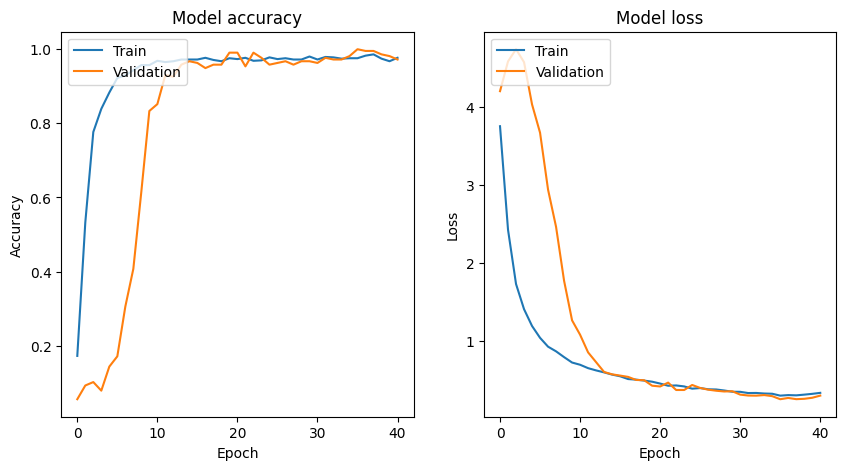

In [36]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Descripción general

Este código calcula y visualiza la matriz de confusión utilizando las predicciones del modelo y las etiquetas reales.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
Tamaño de y_true: 216
Tamaño de y_pred: 216


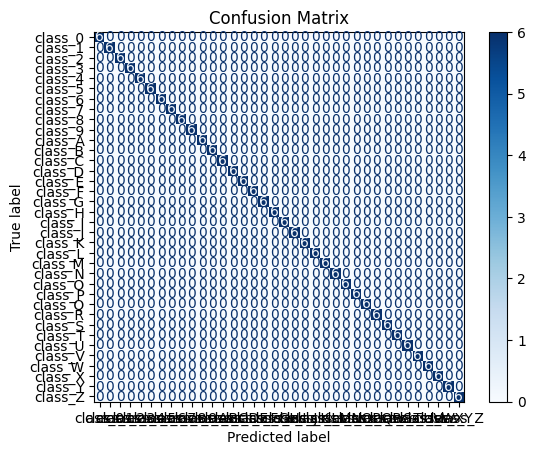

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = []
y_pred = []

# Iterar sobre el conjunto de prueba
for images, labels in validation_dataset:
    y_true.extend(labels.numpy())  # Verdaderas etiquetas

    # Obtener las predicciones
    predictions = model.predict(images)  # Probabilidades predichas
    predicted_classes = np.argmax(predictions, axis=1)  # Convertir a clases
    y_pred.extend(predicted_classes)  # Agregar las clases predichas

# Asegúrate de que las longitudes sean iguales
print(f"Tamaño de y_true: {len(y_true)}")
print(f"Tamaño de y_pred: {len(y_pred)}")

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)

# Mostrar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Este código calcula varias métricas de rendimiento para cada clase a partir de una matriz de confusión. Las métricas que se calculan incluyen:

- *Accuracy (Exactitud)*
- *Precision (Precisión)*
- *Recall (Sensibilidad o Recobrado)*
- *Specificity (Especificidad)*
- *F1-Score*

In [45]:
def get_performance_metrics(conf_matrix):
    # Inicializar listas para almacenar las métricas por clase
    accuracy_per_class = []
    precision_per_class = []
    recall_per_class = []
    specificity_per_class = []
    f1_score_per_class = []

    # Iterar sobre cada clase (diagonal de la matriz de confusión)
    for i in range(len(conf_matrix)):
        # Verdaderos Positivos (TP)
        tp = conf_matrix[i, i]

        # Falsos Positivos (FP) - Columna de la clase i sin el verdadero positivo
        fp = conf_matrix[:, i].sum() - tp

        # Falsos Negativos (FN) - Fila de la clase i sin el verdadero positivo
        fn = conf_matrix[i, :].sum() - tp

        # Verdaderos Negativos (TN) - Todo lo demás que no está en la fila o columna de la clase i
        tn = conf_matrix.sum() - (tp + fp + fn)

        # Calcular las métricas para la clase i
        accuracy = (tp + tn) / conf_matrix.sum()
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        # Almacenar las métricas para la clase
        accuracy_per_class.append(accuracy)
        precision_per_class.append(precision)
        recall_per_class.append(recall)
        specificity_per_class.append(specificity)
        f1_score_per_class.append(f1)

    return accuracy_per_class, precision_per_class, recall_per_class, specificity_per_class, f1_score_per_class

# Obtener métricas
accuracy_per_class, precision_per_class, recall_per_class, specificity_per_class, f1_score_per_class = get_performance_metrics(conf_matrix)

# Mostrar resultados con etiquetas de clases
for i, class_name in enumerate(class_names):
    print(f"\nClase: {class_name}")
    print(f"Accuracy: {accuracy_per_class[i]:0.6f}")
    print(f"Precision: {precision_per_class[i]:0.6f}")
    print(f"Recall: {recall_per_class[i]:0.6f}")
    print(f"Specificity: {specificity_per_class[i]:0.6f}")
    print(f"F1-score: {f1_score_per_class[i]:0.6f}")



Clase: class_0
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_1
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_2
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_3
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_4
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_5
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_6
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_7
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1-score: 1.000000

Clase: class_8
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
Specificity: 1.000000
F1

In [37]:

import numpy as np

# Assuming 'thresholded_rectangles' contains the preprocessed image data
# and 'model' is your trained TensorFlow/Keras model

predictions = []
for rect_data in thresholded_rectangles:
    # Prepare the image for prediction
    img = rect_data['pixels']
    img = np.expand_dims(img, axis=-1) # Add channel dimension if it's grayscale (1 channel)
    img = np.repeat(img, 3, axis=-1) # Repeat the grayscale channel 3 times to match the input shape (3 channels)
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make the prediction
    prediction = model.predict(img)

    # Process the prediction (e.g., get the class with the highest probability)
    predicted_class = np.argmax(prediction) # Assuming it's a classification problem

    predictions.append({
        'u': rect_data['u'],
        'v': rect_data['v'],
        'prediction': predicted_class
    })

# Now 'predictions' contains the predictions for each rectangle
for pred in predictions:
    print(f"Rectangle at (u={pred['u']}, v={pred['v']}) - Predicted class: {pred['prediction']}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Rectangle at (u=81, v=151) - Predicted class: 6
Rectangle at (u=112, v=149) - Predicted class: 8
Rectangle at (u=161, v=150) - Predicted class: 6
Rectangle at (u=192, v=149) - Predicted class: 8
Rectangle at (u=212, v=147) - Predicted class: 33
Rectangle at (u=247, v=149) - Predicted class: 3
Rectangle at (u=279, v=148) - Predicted class: 6


Se muestra el resultado obtenido por parte de la red junto con la imagen que se esta analizando

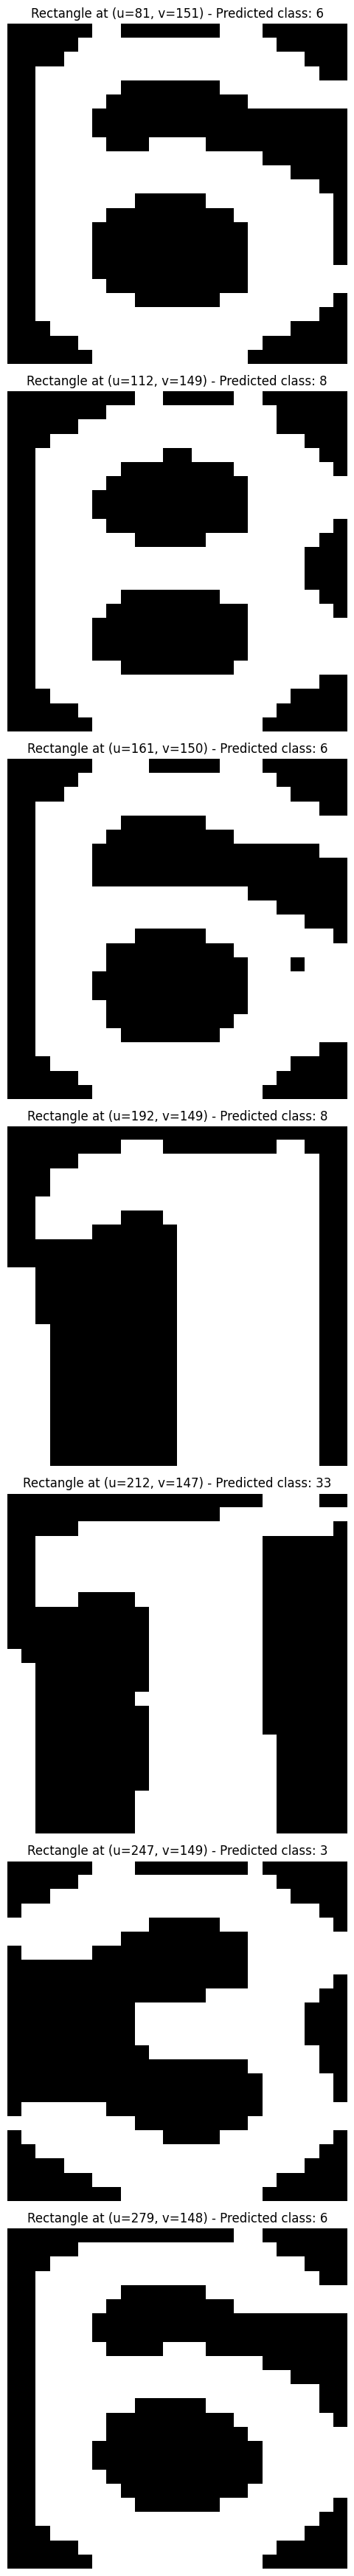

In [38]:

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(len(predictions), 1, figsize=(5, 5 * len(predictions)))

for i, pred in enumerate(predictions):
    # Display the image
    axes[i].imshow(thresholded_rectangles[i]['pixels'], cmap='gray')
    axes[i].set_title(f"Rectangle at (u={pred['u']}, v={pred['v']}) - Predicted class: {pred['prediction']}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Conclusiones

1. **José Miguel González Zaragoza**: En este proyecto, me enfoqué en la implementación de redes convolucionales y su uso en tiempo real, especialmente en labores de visión computacional para identificar matrículas de vehículos. Este procedimiento conllevó diversos desafíos técnicos, tales como dividir zonas pertinentes, gestionar fluctuaciones en color y resolución, y ajustar los tensores al formato correcto para la red neuronal. A pesar de que los hallazgos no resultaron completamente satisfactorios, detectamos que las principales restricciones se vinculan con el preprocesamiento de imágenes y la escasez de datos en las bases de entrenamiento.
\
Como tarea futura, es crucial fortalecer el sistema de visión a través de métodos más sofisticados de segmentación y normalización, así como expandir y perfeccionar las bases de datos de entrenamiento para maximizar la generalización del modelo. Este proyecto no solo incrementó mis habilidades técnicas en redes neuronales y visión computacional, sino que también resaltó la relevancia de un enfoque holístico en cada fase, desde la recolección de datos hasta la elaboración del modelo, para solucionar problemas complicados de forma más eficaz.
2. **Joel Enrique Díaz Villanueva**: En el desarrollo de este proyecto, conseguimos implementar las redes neuronales convolucionales y, de alguna forma, implementar el concepto de transfer learning. Esto se logró mediante el uso de una base de datos centrada en imágenes segmentadas a través de la visión computacional, concretamente para la identificación de matrículas de vehículos.
\
Pese a los progresos, nos topamos con varios retos durante el proceso. Creo que el principal desafío radicaba en la puesta en marcha de un sistema de visión computacional más sólido, que facilitara una división más exacta de los caracteres. Una segmentación mejor optimizada habría permitido que la red neuronal consiguiera una distinción más eficaz entre letras y números, debido a que el entrenamiento de la red neuronal convolucional fue exitoso, donde a pesar de contar con pocos datos de validación, este se entrenó con más de 864 archivos, evidenciando su habilidad para ajustarse y aprender de los datos existentes. Esto subraya la relevancia de la calidad en la segmentación en la fase inicial para mejorar el desempeño del modelo.
3. **David Sebastián Izaguirre Garza**: Durante el desarrollo de este proyecto, logré implementar redes neuronales convolucionales y explorar el concepto de aprendizaje por transferencia, utilizando una base de datos enfocada en imágenes segmentadas para la identificación de matrículas vehiculares. Este desafío requirió la integración de técnicas avanzadas de visión computacional, particularmente para segmentar las matrículas y distinguir con precisión los caracteres. A pesar de los avances logrados, el proceso no estuvo exento de dificultades, siendo el principal reto la creación de un sistema de visión más robusto, que permitiera una segmentación más precisa y una mejor clasificación de letras y números. Este obstáculo subraya la importancia de perfeccionar las etapas previas al entrenamiento, como la segmentación y el preprocesamiento de imágenes.

Aunque la cantidad de datos de validación era limitada, conseguimos entrenar la red neuronal convolucional con más de 864 archivos, lo que evidenció su capacidad de aprendizaje y adaptación a los datos disponibles. Este logro destaca la relevancia de una segmentación de calidad en la fase inicial, ya que impacta directamente en el desempeño del modelo. De cara al futuro, es esencial fortalecer el sistema de visión, optimizando la segmentación y ampliando la base de datos de entrenamiento para mejorar la precisión y robustez del modelo. Este proyecto no solo amplió mis conocimientos técnicos sobre redes convolucionales y visión computacional, sino que también me brindó una visión más profunda sobre la necesidad de un enfoque integral y detallado en todas las fases del desarrollo para abordar problemas complejos de manera eficiente.


## Github

- Joel: https://github.com/joeledv/Final-Project
- José Miguel: https://github.com/jmikelel/protyecto-final-IA-II
- David: https://github.com/DavidIza/Proyecto_Final_IA2